In [48]:
import imports

In [49]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import eda


plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
% load_ext giphy_magic

The giphy_magic extension is already loaded. To reload it, use:
  %reload_ext giphy_magic


In [141]:
train = pd.read_csv('assets/train_weather.csv')
test = pd.read_csv('assets/test_weather.csv')
un_test = pd.read_csv('assets/test_unspecified_species_coded_weather.csv')


In [142]:
train

,WnvPresent,"AddressNumberAndStreet_1000 E 67TH ST, Chicago, IL","AddressNumberAndStreet_1000 N CENTRAL PARK DR, Chicago, IL","AddressNumberAndStreet_1000 S CALIFORNIA AVE, Chicago, IL","AddressNumberAndStreet_1000 S COTTAGE GROVE, Chicago, IL","AddressNumberAndStreet_1000 S STONY ISLAND AVE, Chicago, IL","AddressNumberAndStreet_1000 S VINCENNES, Chicago, IL","AddressNumberAndStreet_1000 W 95TH ST, Chicago, IL","AddressNumberAndStreet_1000 W OHARE AIRPORT, Chicago, IL","AddressNumberAndStreet_1000 W OHARE, Chicago, IL",...,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Tavg,Sunrise,Sunset,PrecipTotal,ResultDir,AvgSpeed,RH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778


In [143]:
test

,"AddressNumberAndStreet_1000 E 67TH ST, Chicago, IL","AddressNumberAndStreet_1000 N CENTRAL PARK DR, Chicago, IL","AddressNumberAndStreet_1000 S CALIFORNIA AVE, Chicago, IL","AddressNumberAndStreet_1000 S COTTAGE GROVE, Chicago, IL","AddressNumberAndStreet_1000 S STONY ISLAND AVE, Chicago, IL","AddressNumberAndStreet_1000 S VINCENNES, Chicago, IL","AddressNumberAndStreet_1000 W 95TH ST, Chicago, IL","AddressNumberAndStreet_1000 W OHARE AIRPORT, Chicago, IL","AddressNumberAndStreet_1000 W OHARE, Chicago, IL","AddressNumberAndStreet_1100 S ARTESIAN AVE, Chicago, IL",...,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Tavg,Sunrise,Sunset,PrecipTotal,ResultDir,AvgSpeed,RH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333


In [144]:
baseline = len(train[train['WnvPresent'] == 0]['WnvPresent']) / float(len(train))
1- baseline

0.053923303834808256

In [201]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation, metrics 


In [259]:
X = train.drop('WnvPresent', 1)
y = train.WnvPresent

X_train, X_test, y_train, y_test = train_test_split(X, y)

D_xgb_mat_train = xgb.DMatrix(X_train, y_train)
D_xgb_mat_test = xgb.DMatrix(X_test, y_test)
D_xgb_test = xgb.DMatrix(test)

In [260]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [254]:
optimized_GBM.fit(X_train, y_train)

/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarni

/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarni

KeyboardInterrupt: 

In [ ]:
optimized_GBM.grid_scores_

In [ ]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(X_train, y_train)

In [ ]:
optimized_GBM.grid_scores_

In [426]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1,
             'learning_rate':0.1} 

a_params = {'objective':'binary:logistic', 'max_depth':3,'silent':0, 
            'eta':0.1, 'subsample': 0.85, 'colsample_bytree': 0.85}
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = a_params, dtrain = D_xgb_mat_train, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [427]:
cv_xgb.tail()

,test-error-mean,test-error-std,train-error-mean,train-error-std
2,0.053816,0.002518,0.053226,0.000629
3,0.053816,0.002518,0.053226,0.000629
4,0.053816,0.002518,0.053226,0.000629
5,0.053816,0.002518,0.053147,0.000730
6,0.053344,0.002135,0.053344,0.000534


In [428]:
final_gb = xgb.train(a_params, D_xgb_mat_test, num_boost_round = 100)

In [429]:
#Predict training set:
X_test_predprob = final_gb.predict(D_xgb_mat_test)

In [430]:
print "AUC Score (Test): %f" % metrics.roc_auc_score(y_test, X_test_predprob)

AUC Score (Test): 0.907555


In [407]:
 final_gb = xgb.train(a_params, D_xgb_mat, num_boost_round = 5)

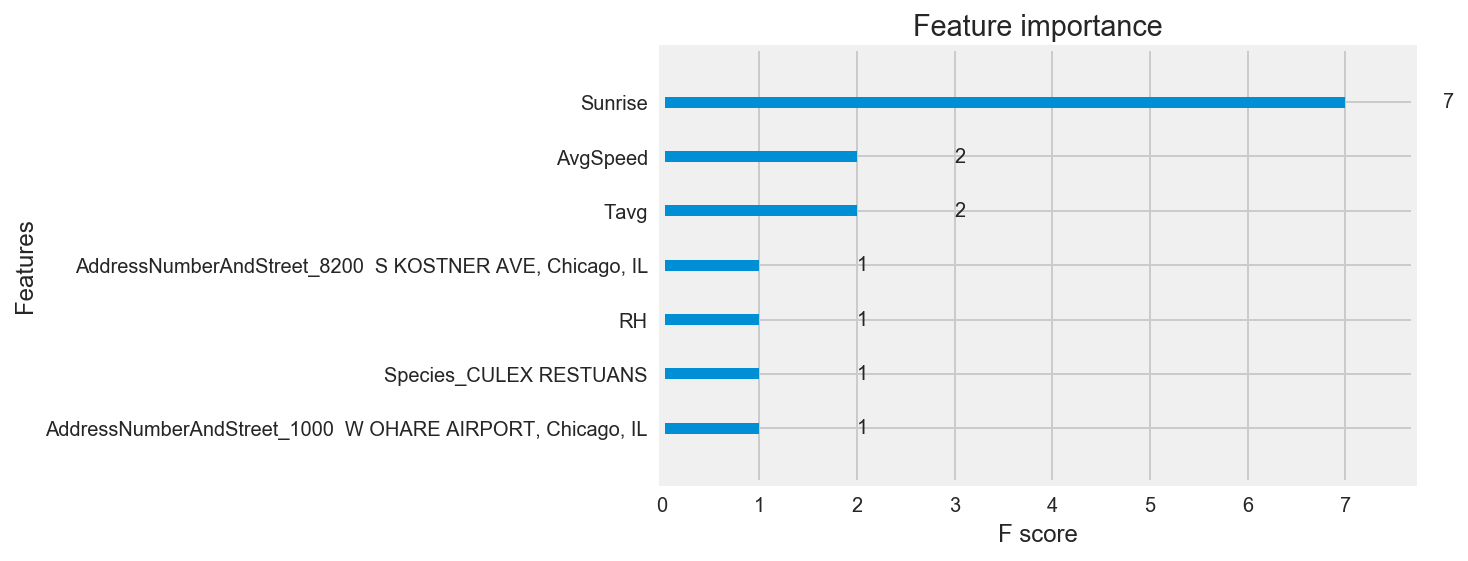

In [408]:
xgb.plot_importance(final_gb)


In [409]:
importances = final_gb.get_fscore()
importances

{'AddressNumberAndStreet_1000  W OHARE AIRPORT, Chicago, IL': 1,
 'AddressNumberAndStreet_8200  S KOSTNER AVE, Chicago, IL': 1,
 'AvgSpeed': 2,
 'RH': 1,
 'Species_CULEX RESTUANS': 1,
 'Sunrise': 7,
 'Tavg': 2}

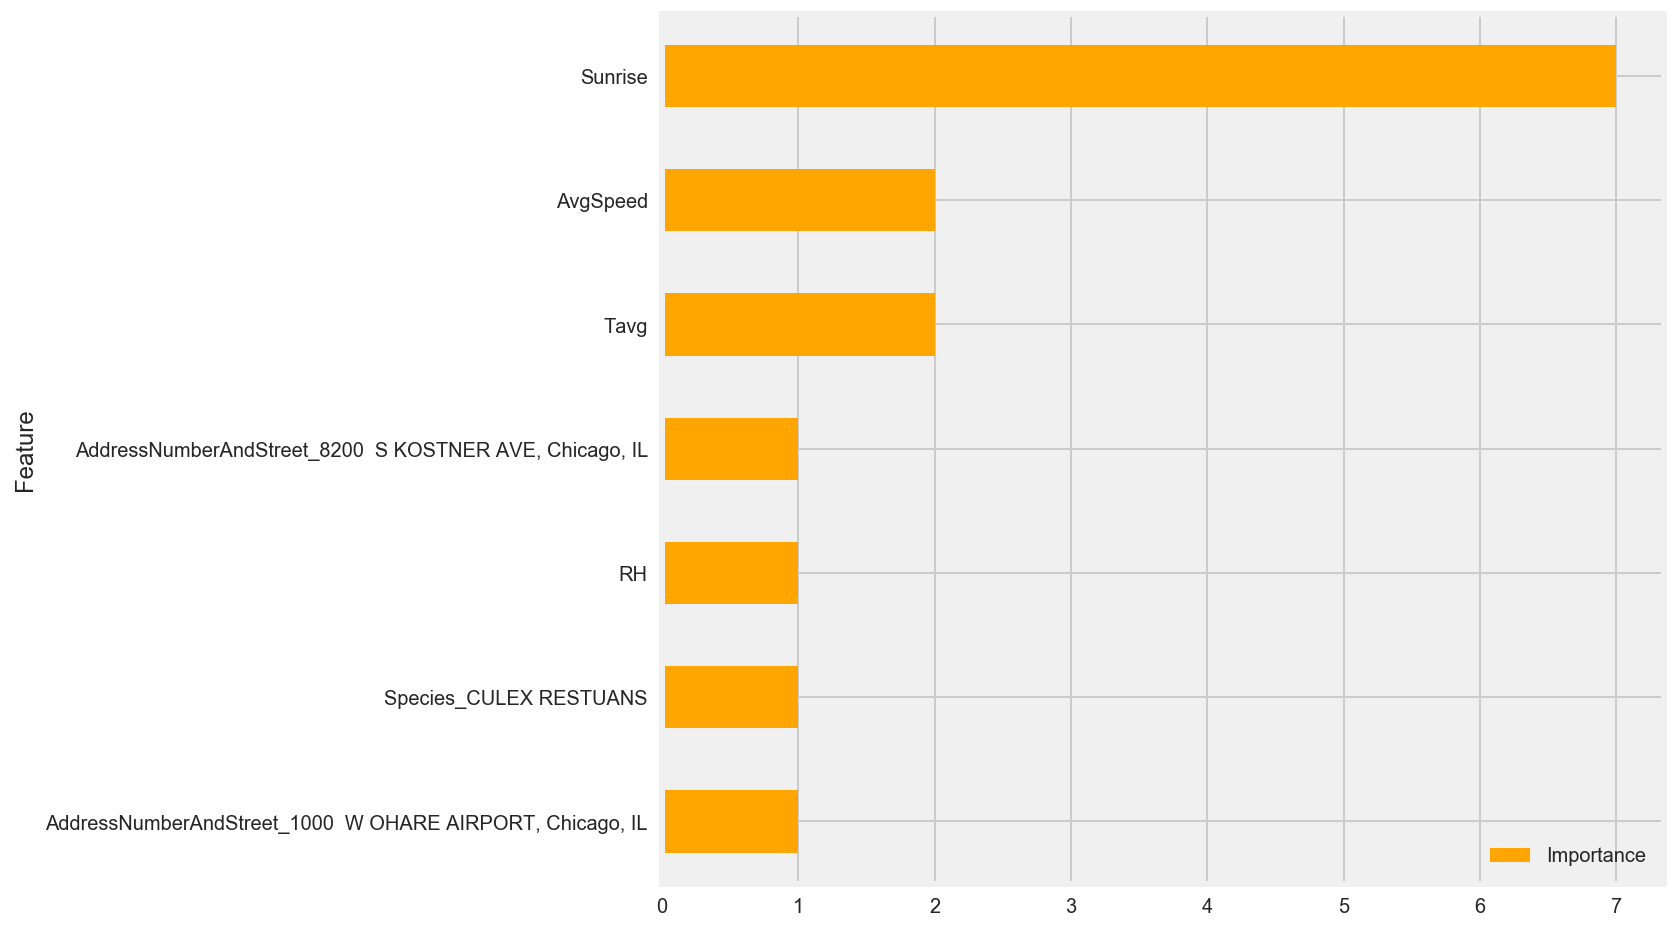

In [410]:
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')

In [380]:
#Predict training set:
X_test_predprob = final_gb.predict(D_xgb_test)
print X_test_predprob

[ 0.01295999  0.00595004  0.01295999 ...,  0.0250691   0.0250691   0.0250691 ]


In [396]:
predictions = final_gb.predict(D_xgb_test)

sample = pd.DataFrame(predictions, columns=['WnvPresent'])
sample['Id'] = (sample.index + 1)

sample.to_csv('NEW_100num_beat_the_benchmark_unbalanced_XGB.csv', index=False)

In [382]:
sample

,WnvPresent,Id
0,0.012960,1
1,0.005950,2
2,0.012960,3
3,0.012960,4
4,0.012960,5
5,0.012960,6
6,0.012960,7
7,0.012960,8
8,0.012960,9
9,0.005950,10


In [204]:
param_test = { 
    'max_depth':range(3,10,1),
    'min_child_weight':range(1,12,1),
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample': [i/100.0 for i in range(60,100,5)],
    'colsample_bytree':[i/100.0 for i in range(60,110,5)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 1e-5, 1e-2, 0.1, 1, 100]
}

In [205]:

# grid = GridSearchCV(xgb, param_test, cv=5, n_jobs=-1)
# grid.fit(X_train, y_train)

# best_xgb = grid.best_estimator_
# print best_xgb

In [207]:


#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]
X_test_predprob = best_xgb.predict_proba(X_test)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)
print "AUC Score (Test): %f" % metrics.roc_auc_score(y_test, X_test_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

AttributeError: type object 'DMatrix' has no attribute 'fit'

In [172]:
predictions = best_xgb.predict_proba(un_test)

sample = pd.DataFrame(predictions[:,1], columns=['WnvPresent'])
sample['Id'] = (sample.index + 1)

sample.to_csv('Big_gri_beat_the_benchmark_unbalanced_XGB.csv', index=False)

In [173]:
sample

,WnvPresent,Id
0,0.001831,1
1,0.001134,2
2,0.001231,3
3,0.000684,4
4,0.000574,5
5,0.001161,6
6,0.001161,7
7,0.001161,8
8,0.001194,9
9,0.000880,10


In [116]:
wnv = train[train['WnvPresent'] == 0]
w1nv = train[train['WnvPresent'] == 1]

In [117]:
wnv

,WnvPresent,"AddressNumberAndStreet_1000 E 67TH ST, Chicago, IL","AddressNumberAndStreet_1000 N CENTRAL PARK DR, Chicago, IL","AddressNumberAndStreet_1000 S CALIFORNIA AVE, Chicago, IL","AddressNumberAndStreet_1000 S COTTAGE GROVE, Chicago, IL","AddressNumberAndStreet_1000 S STONY ISLAND AVE, Chicago, IL","AddressNumberAndStreet_1000 S VINCENNES, Chicago, IL","AddressNumberAndStreet_1000 W 95TH ST, Chicago, IL","AddressNumberAndStreet_1000 W OHARE AIRPORT, Chicago, IL","AddressNumberAndStreet_1000 W OHARE, Chicago, IL",...,Sunrise_1,Sunset_1,Tavg_1,Tavg_2,Tmax_1,Tmax_2,Tmin_1,Tmin_2,WetBulb_1,WetBulb_2
0,0,0,0,0,0,0,0,0,0,0,...,4.350000,19.283333,74.0,77.0,88,88,60,65,65.0,66.0
1,0,0,0,0,0,0,0,0,0,0,...,4.350000,19.283333,74.0,77.0,88,88,60,65,65.0,66.0
2,0,0,0,0,0,0,0,0,0,0,...,4.350000,19.283333,74.0,77.0,88,88,60,65,65.0,66.0
3,0,0,0,0,0,0,0,0,0,0,...,4.350000,19.283333,74.0,77.0,88,88,60,65,65.0,66.0
4,0,0,0,0,0,0,0,0,0,0,...,4.350000,19.283333,74.0,77.0,88,88,60,65,65.0,66.0
5,0,0,0,0,0,0,0,0,0,0,...,4.350000,19.283333,74.0,77.0,88,88,60,65,65.0,66.0
6,0,0,0,0,0,0,0,0,0,0,...,4.350000,19.283333,74.0,77.0,88,88,60,65,65.0,66.0
7,0,0,0,0,0,0,0,0,0,0,...,4.350000,19.283333,74.0,77.0,88,88,60,65,65.0,66.0
8,0,0,0,0,0,0,0,0,0,0,...,4.350000,19.283333,74.0,77.0,88,88,60,65,65.0,66.0
9,0,0,0,0,0,0,0,0,0,0,...,4.350000,19.283333,74.0,77.0,88,88,60,65,65.0,66.0


In [118]:
print 'total', len(train)
print 'No wnv', len(wnv)
print 'wnv', len(w1nv)

total 8475
No wnv 8018
wnv 457


In [119]:
import random

print len(wnv.ix[random.sample(wnv.index, 914)])

print len(wnv)

914
8018


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
wnv = wnv.ix[random.sample(wnv.index, 914)]

In [121]:
balance = pd.concat([wnv, w1nv])

In [122]:
balance


,WnvPresent,"AddressNumberAndStreet_1000 E 67TH ST, Chicago, IL","AddressNumberAndStreet_1000 N CENTRAL PARK DR, Chicago, IL","AddressNumberAndStreet_1000 S CALIFORNIA AVE, Chicago, IL","AddressNumberAndStreet_1000 S COTTAGE GROVE, Chicago, IL","AddressNumberAndStreet_1000 S STONY ISLAND AVE, Chicago, IL","AddressNumberAndStreet_1000 S VINCENNES, Chicago, IL","AddressNumberAndStreet_1000 W 95TH ST, Chicago, IL","AddressNumberAndStreet_1000 W OHARE AIRPORT, Chicago, IL","AddressNumberAndStreet_1000 W OHARE, Chicago, IL",...,Sunrise_1,Sunset_1,Tavg_1,Tavg_2,Tmax_1,Tmax_2,Tmin_1,Tmin_2,WetBulb_1,WetBulb_2
7736,0,0,0,0,0,0,0,0,0,0,...,4.983333,18.900000,65.0,66.0,75,74,55,57,58.0,58.0
5415,0,0,0,0,0,0,0,0,0,0,...,4.633333,19.300000,81.0,82.0,88,90,73,73,71.0,71.0
4105,0,0,0,0,0,0,0,0,0,0,...,4.950000,18.933333,73.0,75.0,86,86,60,63,63.0,63.0
7087,0,0,0,0,0,0,0,0,0,0,...,4.550000,19.383333,84.0,86.0,96,97,71,75,75.0,75.0
4784,0,0,0,0,0,0,0,0,0,0,...,4.266667,19.483333,71.0,73.0,82,82,60,64,64.0,65.0
4999,0,0,0,0,0,0,0,0,0,0,...,4.316667,19.516667,74.0,78.0,88,89,60,66,67.0,67.0
1815,0,0,0,0,0,0,0,0,0,0,...,5.150000,18.666667,75.0,75.0,80,81,69,69,69.0,69.0
5525,0,0,0,0,0,0,0,0,0,0,...,4.700000,19.250000,79.0,80.0,86,86,71,74,71.0,72.0
6555,0,0,0,0,0,0,0,0,0,0,...,4.266667,19.466667,67.0,67.0,78,76,56,57,57.0,57.0
2799,0,0,0,0,0,0,0,0,0,0,...,4.350000,19.266667,58.0,60.0,62,64,54,55,54.0,54.0


In [123]:
baseline = len(balance[balance['WnvPresent'] == 0]['WnvPresent']) / float(len(balance))
baseline

0.6666666666666666

In [124]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation, metrics 
from xgboost import XGBClassifier

In [125]:
X = balance.drop('WnvPresent', 1)
y = balance.WnvPresent

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


Model Report
Accuracy : 0.8502
AUC Score (Train): 0.919956
AUC Score (Test): 0.792762


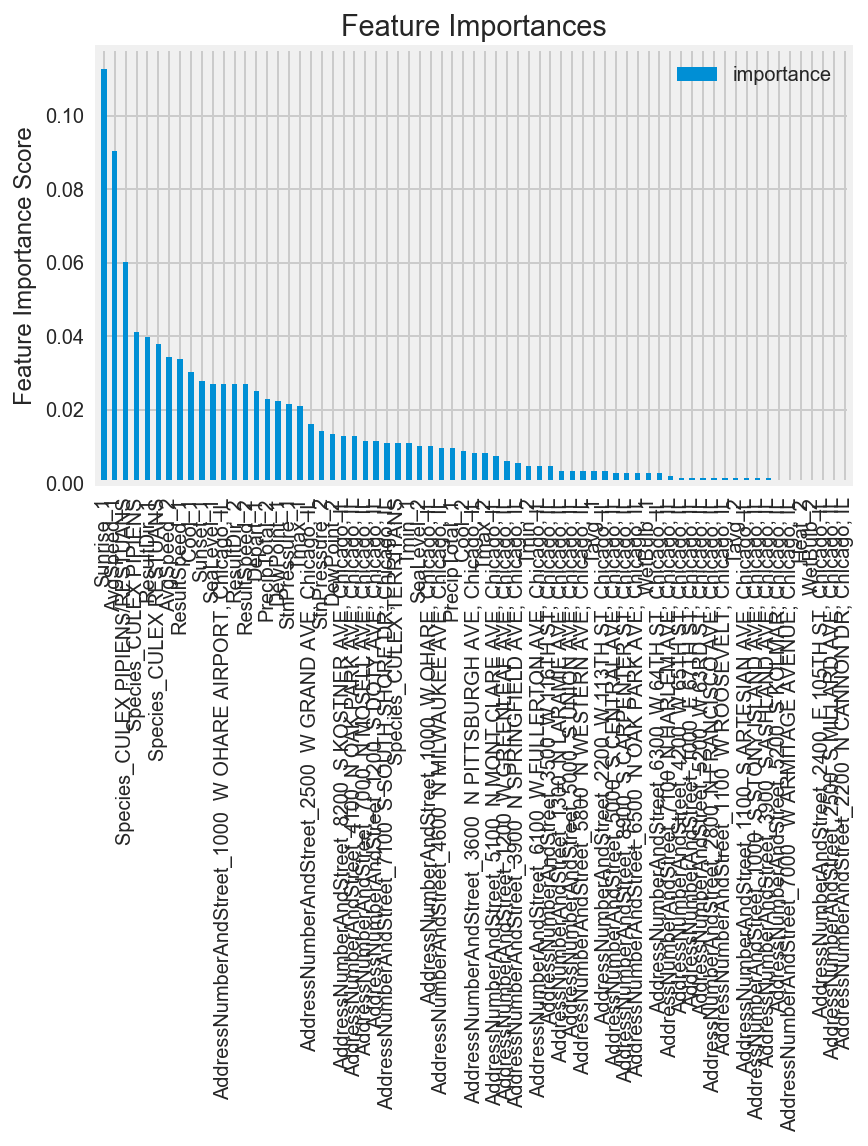

In [127]:
best_xgb = XGBClassifier(base_score=0.334, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.2, learning_rate=0.045, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:logistic', random_state=0,
       reg_alpha = 0.000005, reg_lambda=0.2, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)


best_xgb.fit(X_train, y_train)

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]
X_test_predprob = best_xgb.predict_proba(X_test)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)
print "AUC Score (Test): %f" % metrics.roc_auc_score(y_test, X_test_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [73]:
predictions = best_xgb.predict_proba(test)

sample = pd.DataFrame(predictions[:,1], columns=['WnvPresent'])
sample['Id'] = (sample.index + 1)

sample.to_csv('beat_the_benchmark_all_XGB.csv', index=False)

In [74]:
sample

,WnvPresent,Id
0,0.011720,1
1,0.009827,2
2,0.008781,3
3,0.008895,4
4,0.009521,5
5,0.010413,6
6,0.010413,7
7,0.010413,8
8,0.010533,9
9,0.008840,10


In [84]:
sample[sample.WnvPresent >1]

,WnvPresent,Id


In [139]:
nn = balance.reset_index()

In [140]:
nn = nn.drop('index', 1)

In [147]:
nn

,WnvPresent,"AddressNumberAndStreet_1000 E 67TH ST, Chicago, IL","AddressNumberAndStreet_1000 N CENTRAL PARK DR, Chicago, IL","AddressNumberAndStreet_1000 S CALIFORNIA AVE, Chicago, IL","AddressNumberAndStreet_1000 S COTTAGE GROVE, Chicago, IL","AddressNumberAndStreet_1000 S STONY ISLAND AVE, Chicago, IL","AddressNumberAndStreet_1000 S VINCENNES, Chicago, IL","AddressNumberAndStreet_1000 W 95TH ST, Chicago, IL","AddressNumberAndStreet_1000 W OHARE AIRPORT, Chicago, IL","AddressNumberAndStreet_1000 W OHARE, Chicago, IL",...,Sunrise_1,Sunset_1,Tavg_1,Tavg_2,Tmax_1,Tmax_2,Tmin_1,Tmin_2,WetBulb_1,WetBulb_2
0,0,1,0,0,0,0,0,0,0,0,...,4.550000,19.383333,84.0,86.0,96,97,71,75,75.0,75.0
1,0,0,0,0,0,0,0,0,0,0,...,4.266667,19.500000,76.0,77.0,86,88,65,66,69.0,70.0
2,0,1,0,0,0,0,0,0,0,0,...,5.666667,17.800000,55.0,55.0,62,62,48,48,49.0,51.0
3,0,0,0,0,0,0,0,0,0,1,...,4.283333,19.516667,79.0,80.0,89,89,68,70,71.0,71.0
4,0,0,1,0,0,0,0,0,0,0,...,5.683333,17.766667,79.0,81.0,90,91,68,71,68.0,69.0
5,0,0,0,0,0,0,0,0,0,0,...,5.466667,18.150000,57.0,56.0,67,66,46,46,49.0,50.0
6,0,0,0,0,0,0,0,0,0,0,...,5.683333,17.766667,79.0,81.0,90,91,68,71,68.0,69.0
7,0,0,0,0,0,0,0,0,0,0,...,4.316667,19.516667,74.0,78.0,88,89,60,66,67.0,67.0
8,0,0,0,0,0,0,0,0,0,0,...,4.766667,19.166667,81.0,82.0,91,91,70,73,71.0,72.0
9,0,1,0,0,0,0,0,0,0,0,...,4.616667,19.316667,72.0,73.0,83,83,61,62,64.0,65.0


In [ ]:
from keras import initializers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
X_nn = train.drop('WnvPresent', 1).values
y_nn = train.WnvPresent.values

In [31]:
scaler = StandardScaler()

In [32]:
X_nn = scaler.fit_transform(X_nn)
y_nn = np_utils.to_categorical(y_nn)

In [33]:
X_np_train, X_np_test, y_np_train, y_np_test = train_test_split(X_nn, y_nn)

In [34]:
input_dim = X_np_train.shape[1]

In [40]:
def build_nn(input_dim):
    model = Sequential()
    model.add(Dense(300, input_dim=input_dim,kernel_initializer='normal', activation='relu'))

    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    
    model.add(Dense(2, kernel_initializer='normal', activation='softmax'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Fold #:  1
Building model...
Training model...
Evaluating model...
  32/2119 [..............................] - ETA: 0s[0.36509414608051255, 0.93204341676225078]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 300)               45900     
_________________________________________________________________
dense_91 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_92 (Dense)             (None, 2)                 602       
Total params: 136,802
Trainable params: 136,802
Non-trainable params: 0
_________________________________________________________________
None
ROC:  0.812109178876
Continued Avg:  0.812109178876
Fold #:  2
Building model...
Training model...
Evaluating model...
  32/2119 [..............................] - ETA: 0s[0.46030096069206444, 0.92638036815441682]
___________________

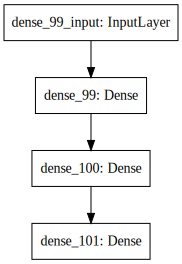

In [388]:
from sklearn.model_selection import KFold

num_folds = 4
av_roc = 0.
count = 0

kf = KFold(n_splits=num_folds, random_state=41, shuffle=True)
for train_index, test_index in kf.split(X_nn):
    
    count += 1
    print 'Fold #: ', count
    
    X_np_train, X_np_test = X_nn[train_index], X_nn[test_index]
    y_np_train, y_np_test = y_nn[train_index], y_nn[test_index]
    
    input_dim = X_np_train.shape[1]
    
    print("Building model...")
    model = build_nn(input_dim)
    
    print("Training model...")
    model.fit(X_np_train, y_np_train, epochs=15, batch_size=30, verbose=0)
    
    
    print("Evaluating model...")
    test_preds = model.predict_proba(X_np_test, verbose=0)
    roc = metrics.roc_auc_score(y_np_test, test_preds)
    
    scores = model.evaluate(X_np_test, y_np_test)
    print scores
    
    print model.summary()
    
    
    print 'ROC: ', roc
    av_roc += roc
    print 'Continued Avg: ', av_roc/count

    
print('Average ROC:', av_roc/num_folds)
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [44]:
test = scaler.fit_transform(test)
test_preds_fin = model.predict_proba(test, verbose=0)

In [46]:
sample_nn = pd.DataFrame(test_preds_fin[:,1], columns=['WnvPresent'])
sample_nn['Id'] = (sample.index + 1)

sample.to_csv('TEST_mbgood_beat_the_benchmark_all_NN.csv', index=False)

In [47]:
sample_nn

,WnvPresent,Id
0,5.181647e-04,1
1,9.690773e-10,2
2,1.460010e-10,3
3,2.168867e-10,4
4,4.976595e-11,5
5,5.739693e-08,6
6,1.005085e-06,7
7,4.990000e-07,8
8,2.233197e-07,9
9,2.123161e-09,10


In [67]:
combine = (sample_nn.WnvPresent + sample.WnvPresent)/2

In [71]:
sample_combo = pd.DataFrame(combine, columns=['WnvPresent'])
sample_combo['Id'] = (sample.index + 1)

sample_combo.to_csv('beat_the_benchmark_all_NN_and_XGB_Old_is_73.csv', index=False)

In [72]:
sample_combo

,WnvPresent,Id
0,0.006119,1
1,0.004913,2
2,0.004391,3
3,0.004447,4
4,0.004761,5
5,0.005206,6
6,0.005207,7
7,0.005207,8
8,0.005267,9
9,0.004420,10


In [384]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

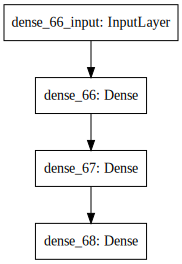

In [385]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))